<a href="https://colab.research.google.com/github/RomanKunal/Deep-Learning/blob/main/Dog_Cat_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DOG vs CAT


In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:51<00:00, 24.4MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.2MB/s]


In [3]:
#Unzip the file
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [13]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
#use generator for extracting files
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

#for test data
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#Normalised data
def process(image,label):
  image=tensorflow.cast(image/255. ,tensorflow.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [23]:
#Create CNN model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))




#Flat the layer
model.add(Flatten())

#add Fully connect layer
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 6,823,361 (26.03 MB)

 Trainable params: 6,822,401 (26.03 MB)

 Non-trainable params: 960 (3.75 KB)

In [25]:
#EarlyStopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',      # Monitor validation loss
    mode='min',              # Stop when val_loss stops decreasing
    patience=5,              # Number of epochs to wait before stopping
    verbose=1,               # Print stopping logs
    restore_best_weights=True # Revert to the best weights after stopping
)

In [26]:
#compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
#fit the model
history = model.fit(
    train_ds,                # Training dataset
    validation_data=validation_ds, # Validation dataset
    epochs=10,              # Maximum number of epochs
    callbacks=[early_stopping] # Apply EarlyStopping
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 96ms/step - accuracy: 0.5488 - loss: 1.2581 - val_accuracy: 0.6580 - val_loss: 0.6098
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 88ms/step - accuracy: 0.6783 - loss: 0.5988 - val_accuracy: 0.6806 - val_loss: 0.6128
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.7370 - loss: 0.5356 - val_accuracy: 0.7182 - val_loss: 0.5758
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 92ms/step - accuracy: 0.8010 - loss: 0.4413 - val_accuracy: 0.7776 - val_loss: 0.4770
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 92ms/step - accuracy: 0.8445 - loss: 0.3550 - val_accuracy: 0.8136 - val_loss: 0.4006
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.8927 - loss: 0.2616 - val_accuracy: 0.8528 - val_loss: 0.3412
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.9226 - loss: 0.1907 - val_accuracy: 0.8834 - val_loss: 0.3040
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.9493 - loss: 0.1328 - 

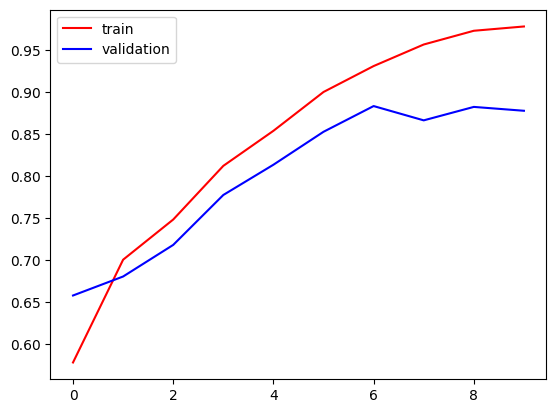

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

# Model is overfitted

Overcome from Overfitting
1. Add mode data
2. Data augmentation
3. L1/L2 regularization
4. Dropout
5. Batch Norm
6. Reduce Complexity

In [29]:
# Evaluate the model on the train dataset
train_loss, train_accuracy = model.evaluate(train_ds)

# Print the accuracy
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")


625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - accuracy: 0.9461 - loss: 0.1371
Train Accuracy: 95.57%


In [30]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(validation_ds)

# Print the accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.8878 - loss: 0.2902
Test Accuracy: 88.34%


# checking model

In [31]:
import cv2

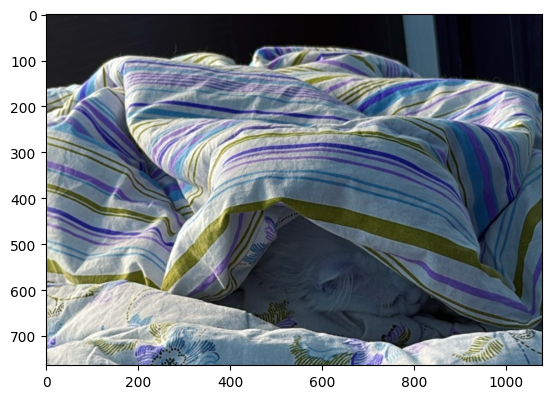

In [46]:
test_img=cv2.imread('/content/Screenshot_20241215_135318.jpg')
plt.imshow(test_img)


In [47]:
test_img.shape

(764, 1080, 3)

In [48]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))

In [49]:
if model.predict(test_input)>0.5:
  print('Dog')
else:
  print('Cat')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Dog
